# Datasets Visualization

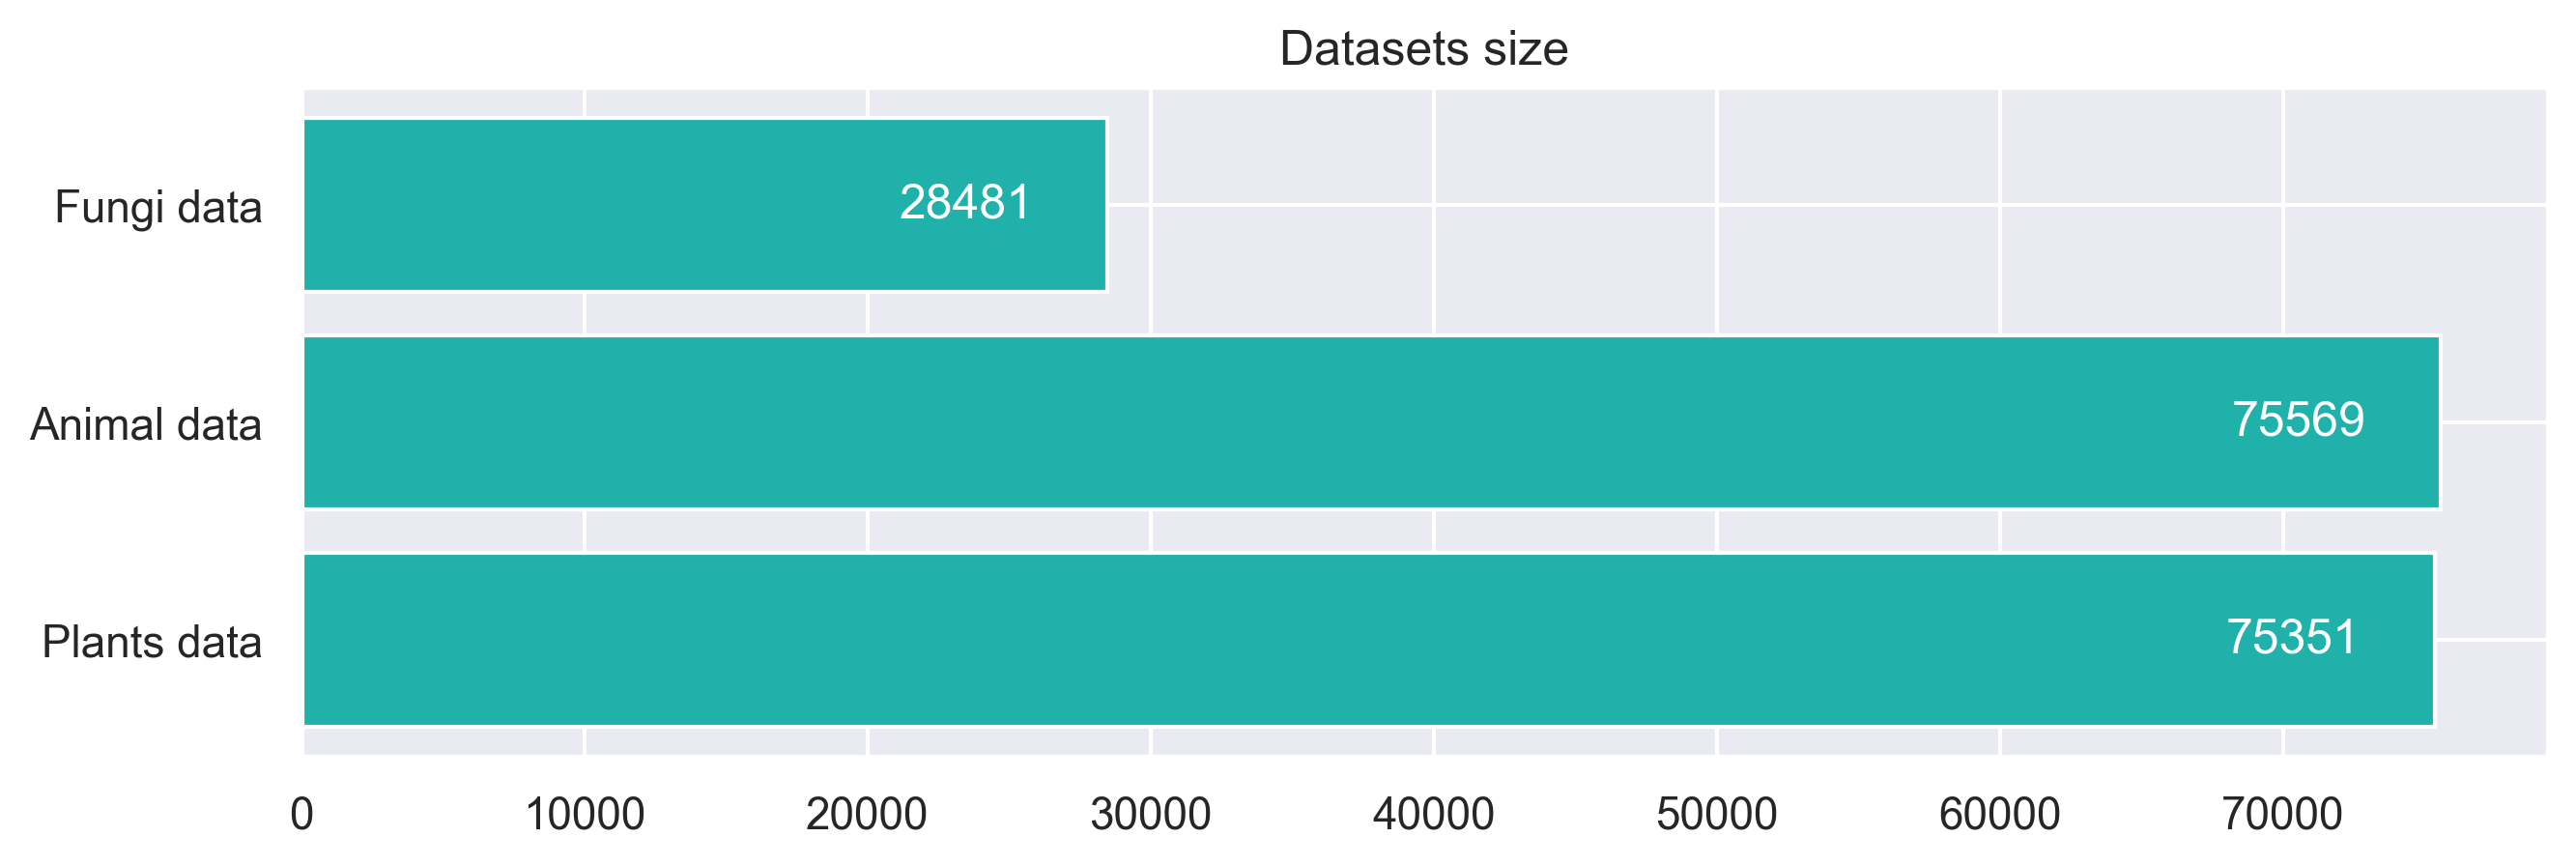

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(color_codes=True)

plants_dataset = pd.read_csv('Plants_data.csv', sep=',')
animal_dataset = pd.read_csv('Animal_data.csv', sep=',')
fungi_dataset = pd.read_csv('Fungi_data.csv', sep=',').drop('Unnamed: 0', axis=1)

# Plot datasets size
fig, ax = plt.subplots(figsize=(10, 3), dpi=300)
datasets_names = ['Plants data', 'Animal data', 'Fungi data']
datasets_counts = [plants_dataset.shape[0], animal_dataset.shape[0], fungi_dataset.shape[0]]
ax.barh(datasets_names, datasets_counts, color='lightseagreen')
ax.set_title('Datasets size')
# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width-5000, bottom+height/2), 
                     ha='center', va='center', color='white')
plt.show()

# Feature importances

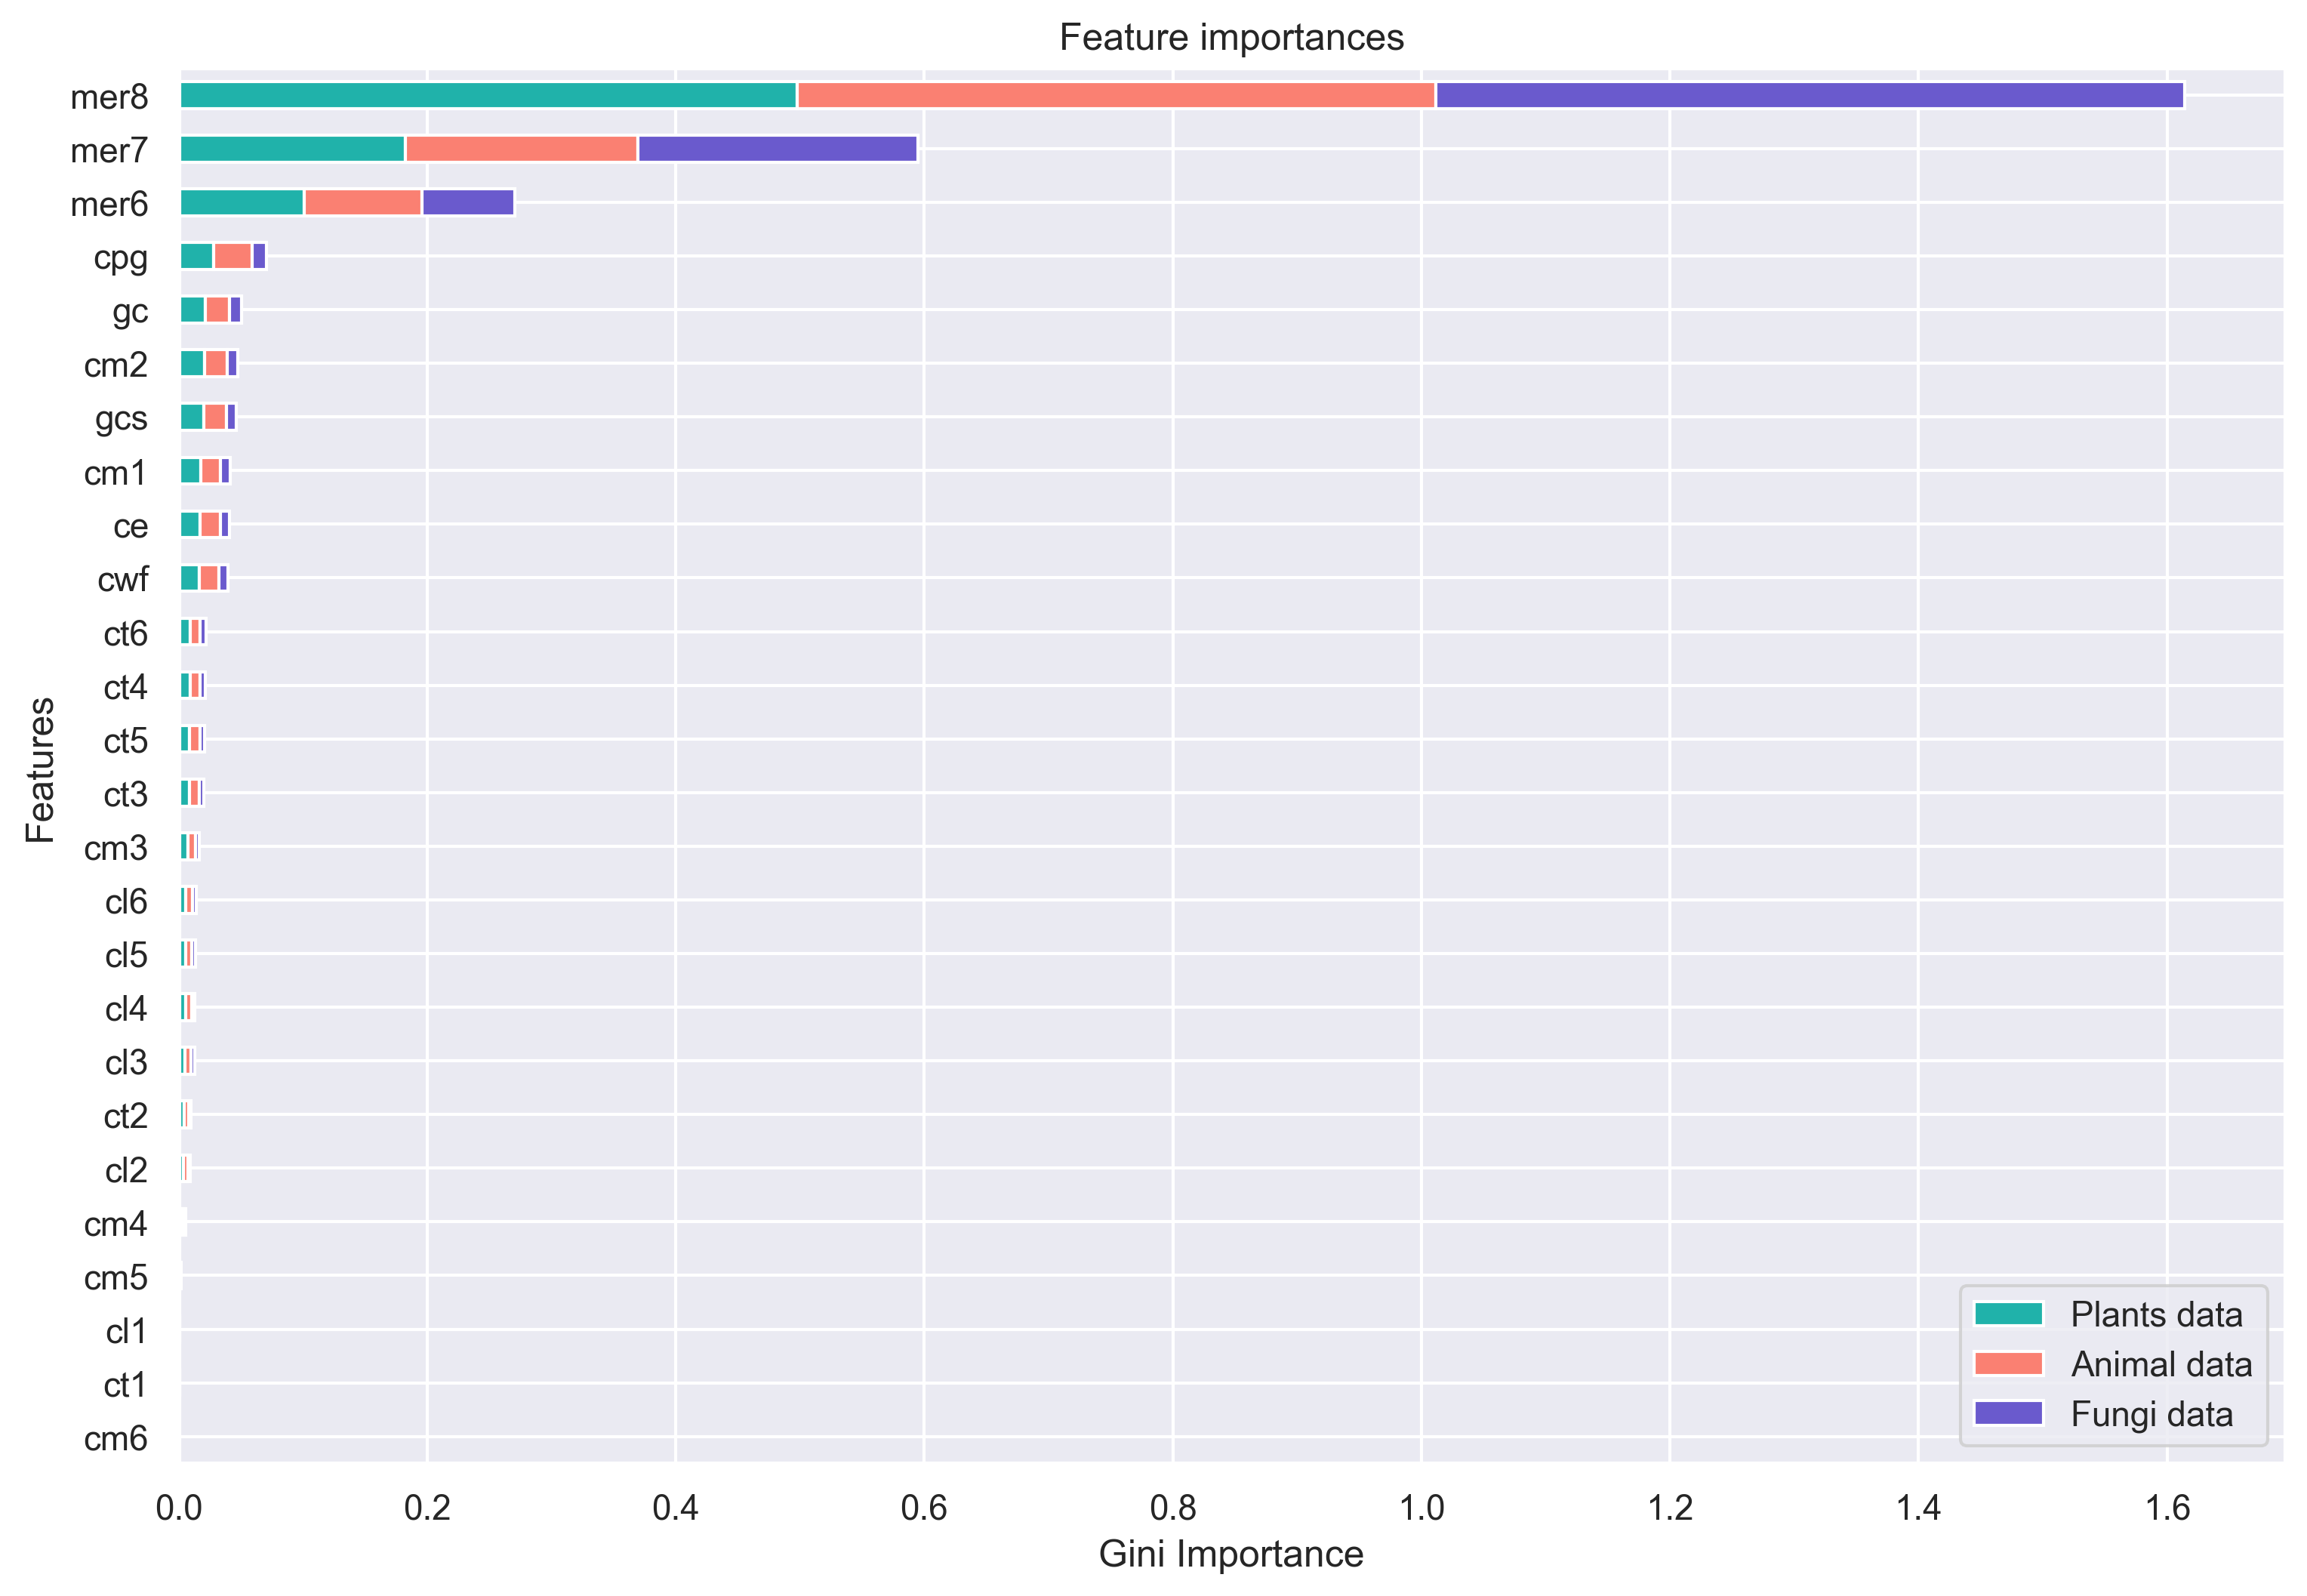

In [85]:
# Feature importances
save_path = 'RandomForest/split_0/feature_importances.csv'
plants_importances = pd.read_csv(f'PlantsData/{save_path}').drop('Unnamed: 0', axis=1)
animal_importances = pd.read_csv(f'AnimalData/{save_path}').drop('Unnamed: 0', axis=1)
fungi_importances = pd.read_csv(f'FungiData/{save_path}').drop('Unnamed: 0', axis=1)

df_feats = pd.DataFrame({'Plants data': list(plants_importances['importance']),
                        'Animal data': list(animal_importances['importance']),
                        'Fungi data': list(fungi_importances['importance'])}, 
                        index=plants_importances['feature'])[::-1]

fig, ax = plt.subplots(figsize=(12,8), dpi=300)
df_feats.plot(kind='barh', stacked=True, ax=ax, color=['lightseagreen', 'salmon', 'slateblue'])
ax.set_title("Feature importances")
ax.set_ylabel("Features")
ax.set_xlabel("Gini Importance")
ax.legend(loc='lower right')

In [87]:
df_feats

,Plants data,Animal data,Fungi data
feature,,,
cm6,0.000208,0.000108,0.000091
ct1,0.000290,0.000246,0.000115
cl1,0.000387,0.000246,0.000125
cm5,0.000733,0.000564,0.000464
cm4,0.002629,0.002180,0.001021
cl2,0.003975,0.003669,0.001757
ct2,0.004364,0.003783,0.001908
cl3,0.005182,0.004824,0.002662
cl4,0.005375,0.004959,0.002765


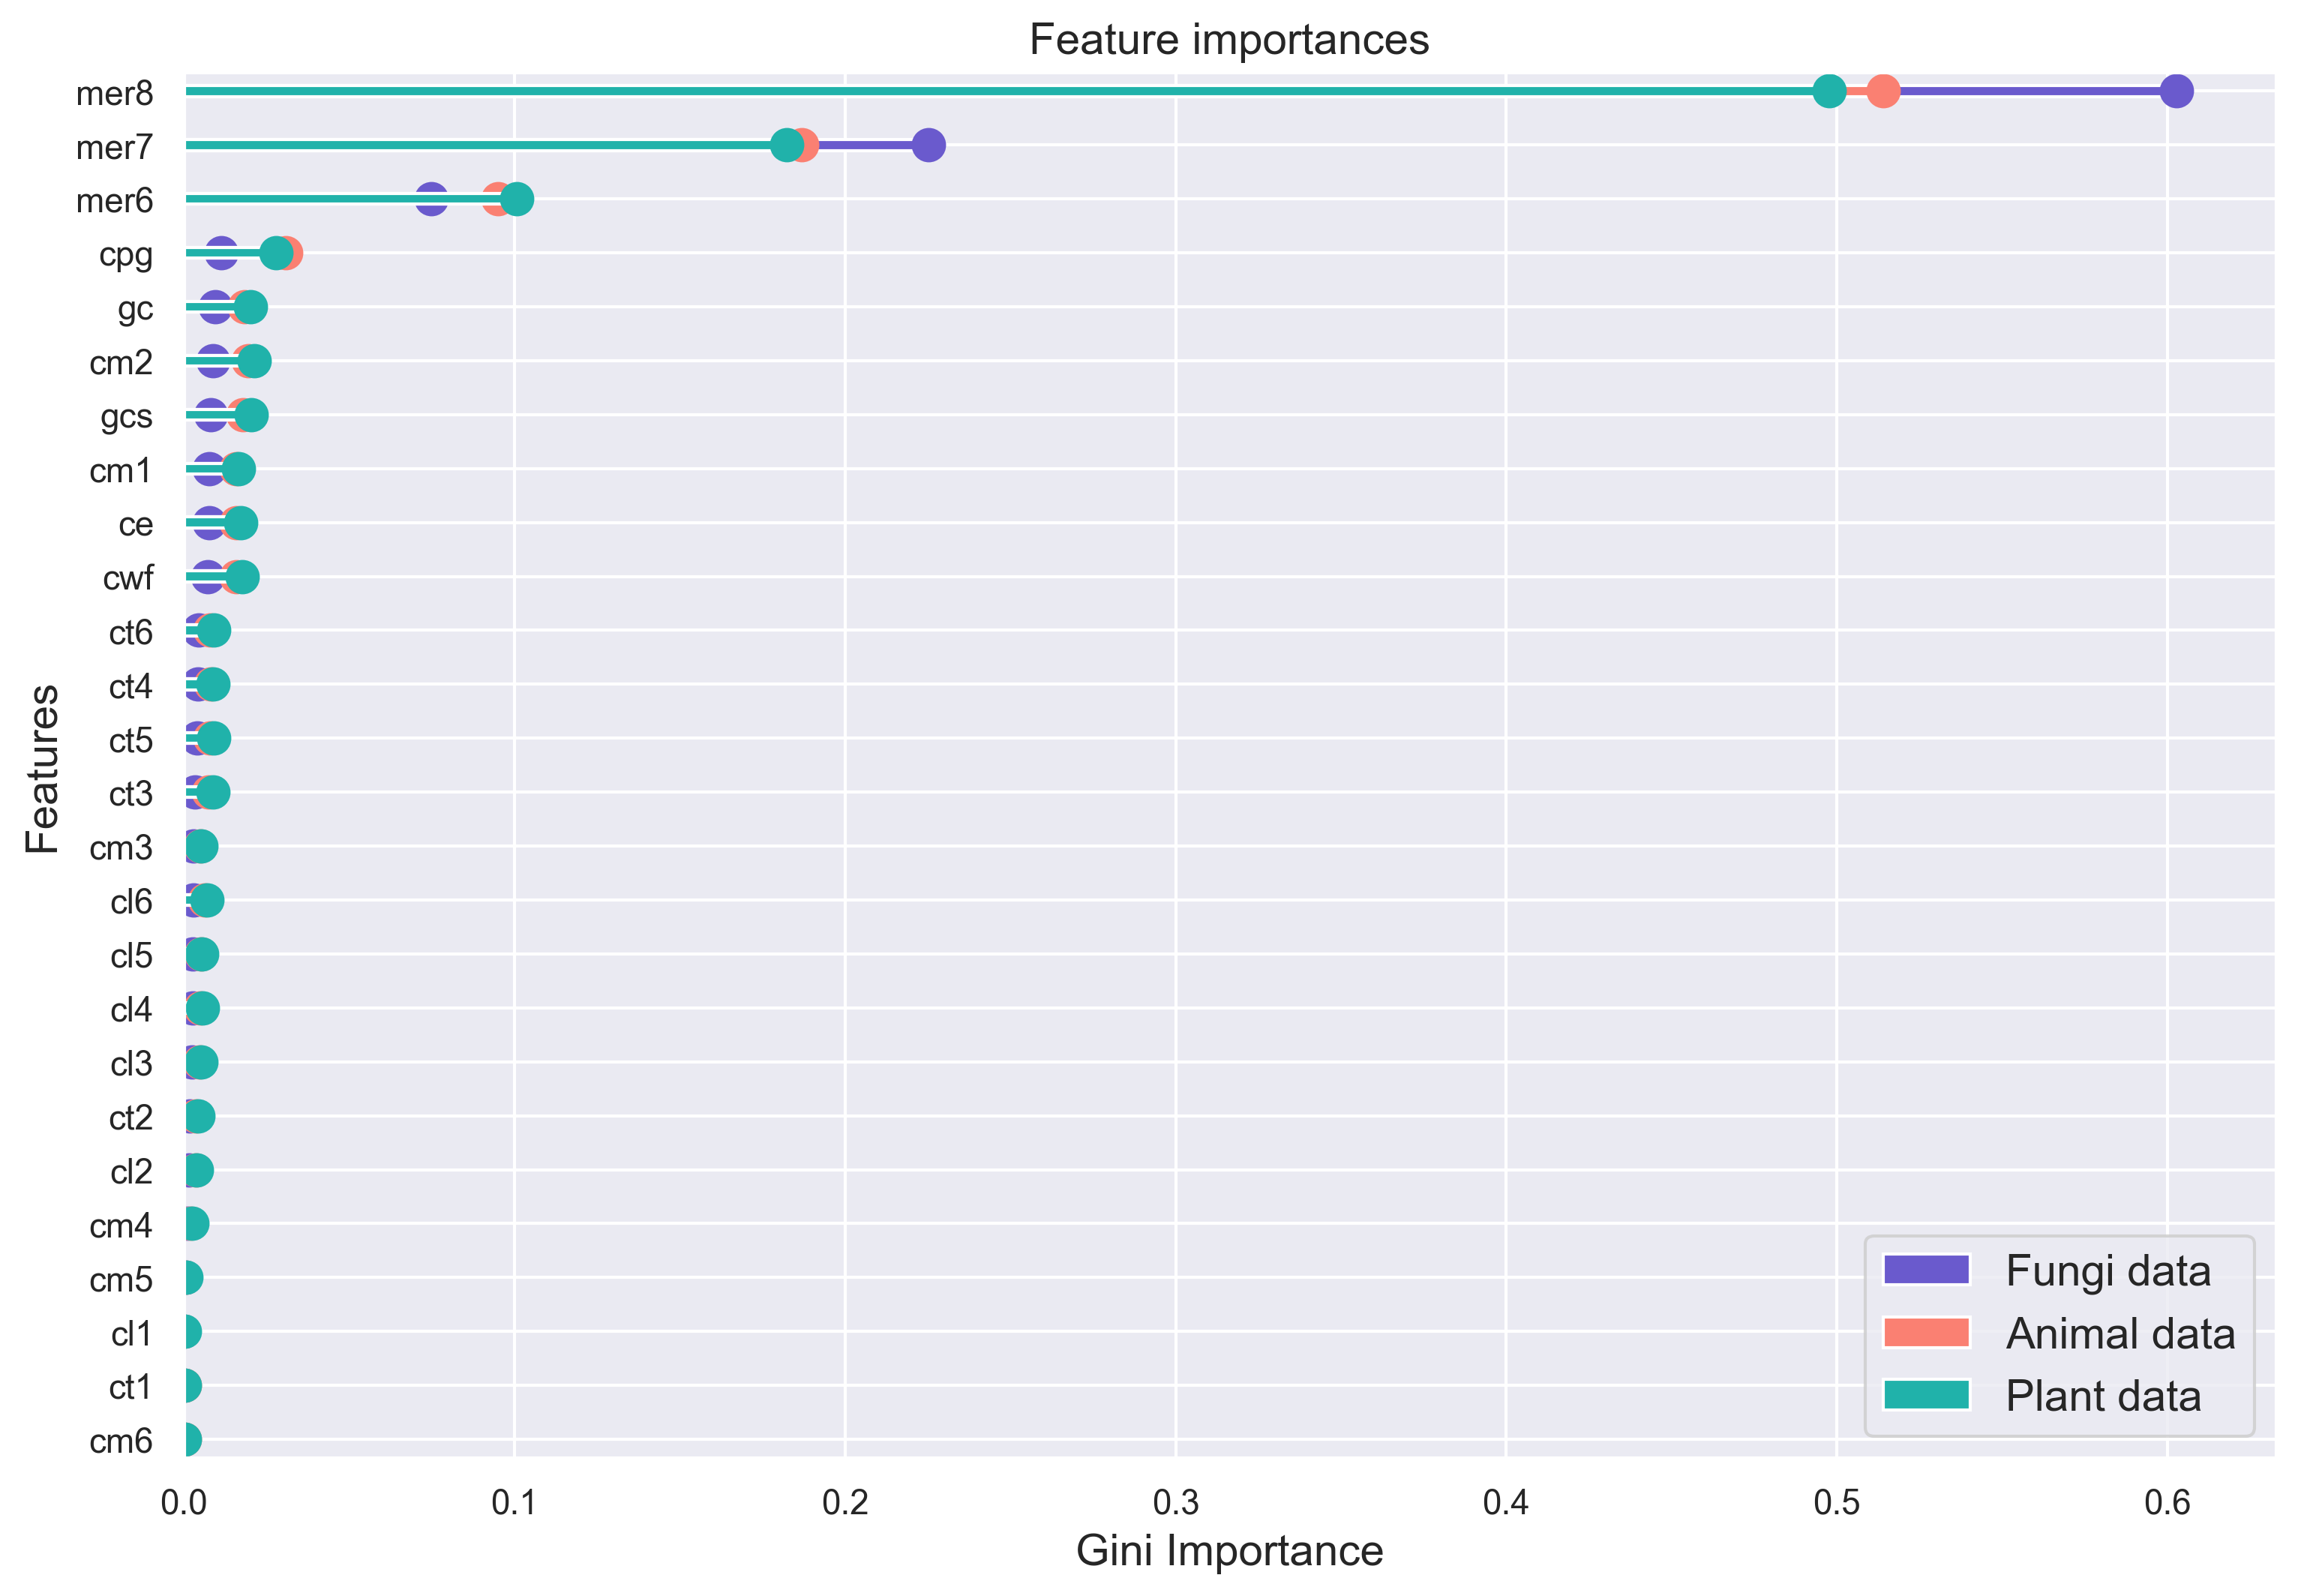

In [92]:
# Feature importances
save_path = 'RandomForest/split_0/feature_importances.csv'
plants_importances = pd.read_csv(f'PlantsData/{save_path}').drop('Unnamed: 0', axis=1)[::-1]
animal_importances = pd.read_csv(f'AnimalData/{save_path}').drop('Unnamed: 0', axis=1)[::-1]
fungi_importances = pd.read_csv(f'FungiData/{save_path}').drop('Unnamed: 0', axis=1)[::-1]

fig, ax = plt.subplots(figsize=(12,8), dpi=300)
fungi_importances.plot(x='feature', y='importance', kind='barh', width=0.2, ax=ax, color='slateblue', label='Fungi data')
ax.scatter(x=fungi_importances['importance'], y=fungi_importances['feature'], s=100, color='slateblue')

animal_importances.plot(x='feature', y='importance', kind='barh', width=0.2, ax=ax, color='salmon', label="Animal data")
ax.scatter(x=animal_importances['importance'], y=animal_importances['feature'], s=100, color='salmon')

plants_importances.plot(x='feature', y='importance', kind='barh', width=0.2, ax=ax, color='lightseagreen', label="Plant data")
ax.scatter(x=plants_importances['importance'], y=plants_importances['feature'], s=100, color='lightseagreen')

ax.set_title("Feature importances", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
ax.set_xlabel("Gini Importance", fontsize=14)
ax.legend(loc='lower right', fontsize=14)

# Class balance in datasets

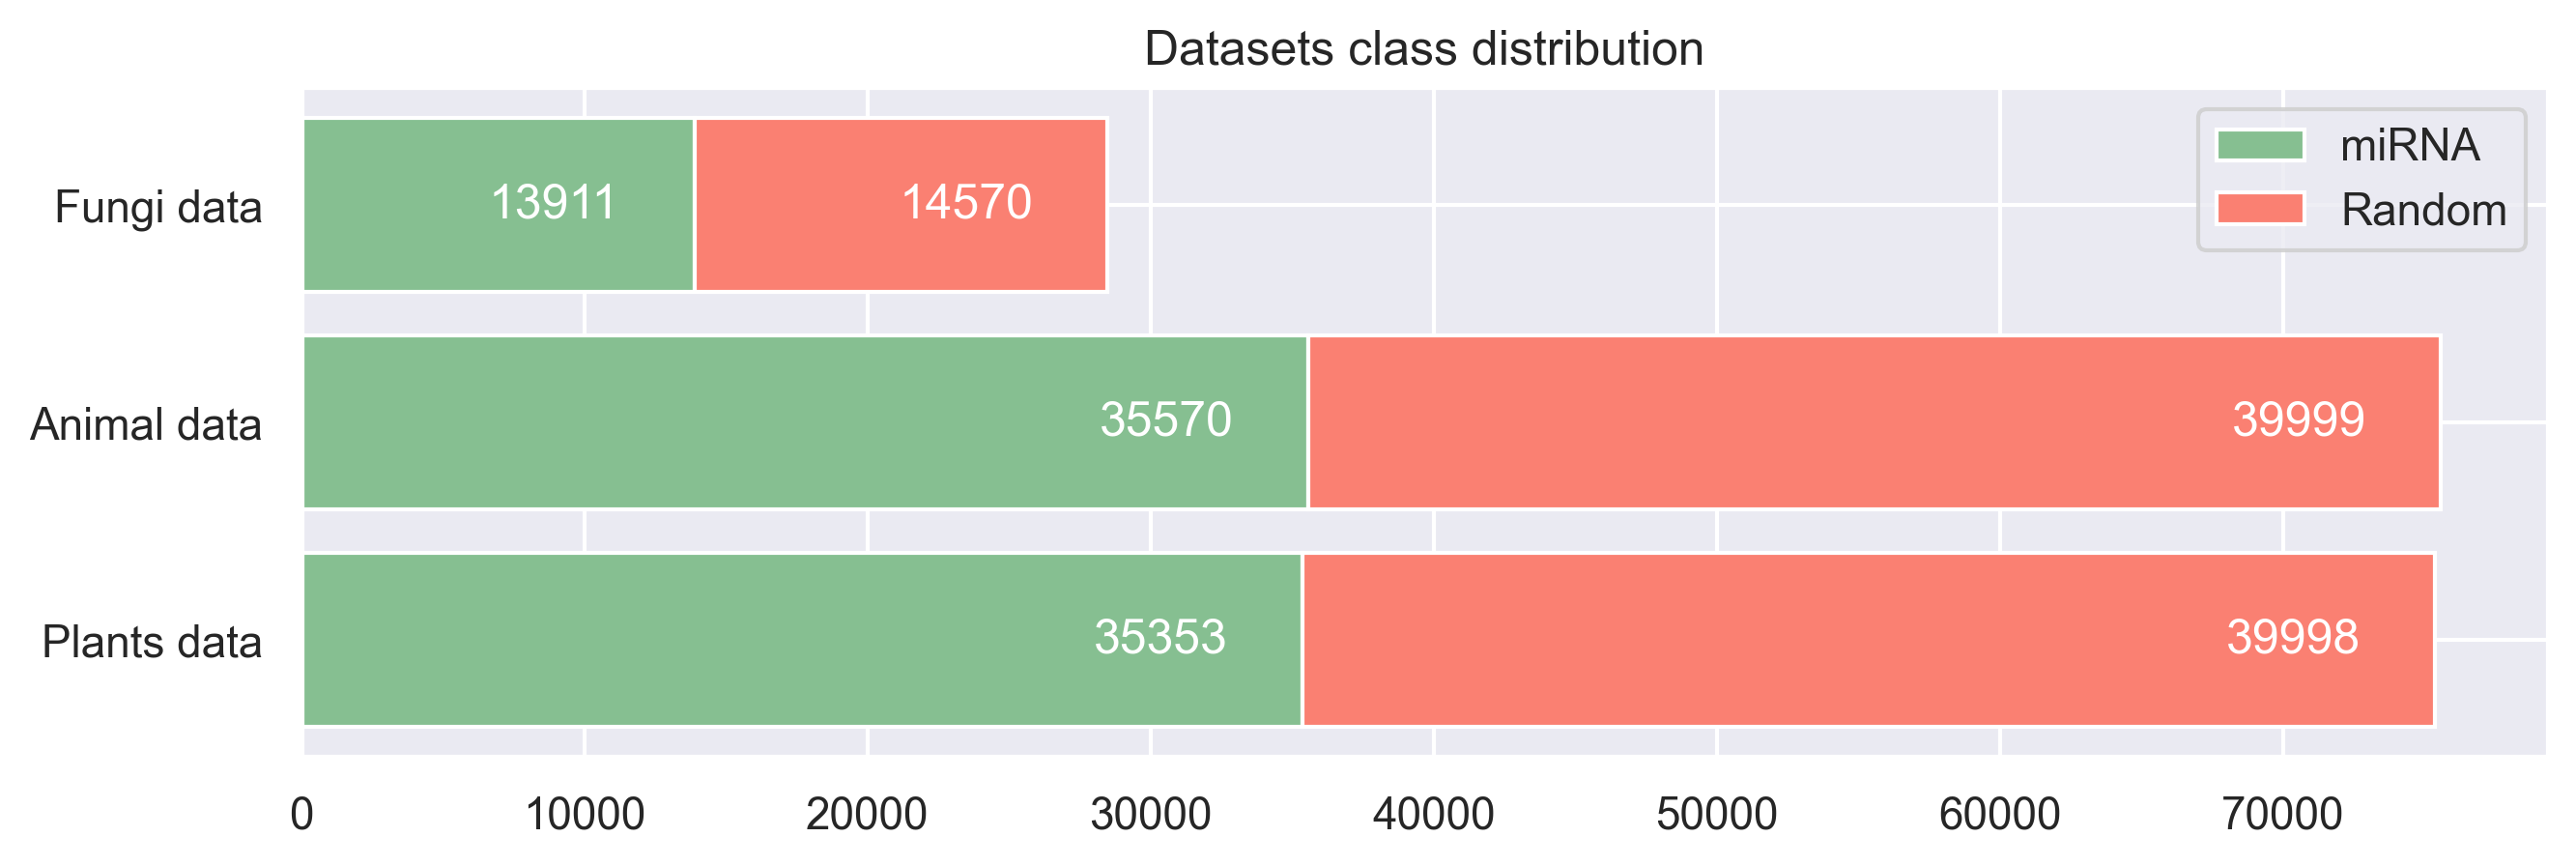

In [70]:
datasets_names = ['Plants data', 'Animal data', 'Fungi data']
rand_counts = [plants_dataset['type'].value_counts()[0], 
               animal_dataset['type'].value_counts()[0], 
               fungi_dataset['type'].value_counts()[0]]
miRNA_counts = [plants_dataset['type'].value_counts()[1], 
                animal_dataset['type'].value_counts()[1], 
                fungi_dataset['type'].value_counts()[1]]

# Plot distribution
fig, ax = plt.subplots(figsize=(10, 3), dpi=300)
ax.barh(datasets_names, miRNA_counts, color='#86bf91')
ax.barh(datasets_names, rand_counts, left=miRNA_counts, color='salmon')
ax.set_title('Datasets class distribution')
ax.legend(['miRNA', 'Random'])
# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width-5000, bottom+height/2), 
                     ha='center', va='center', color='white')

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

df = pd.DataFrame(columns=['Train', 'Test'] + [f'Train Split {i+1}' for i in range(5)]
                  + [f'Validation Split {i+1}' for i in range(5)],
                  index=['Plants data (Rand)', 'Plants data (miRNA)',
                         'Animal data (Rand)', 'Animal data (miRNA)',
                         'Fungi data (Rand)', 'Fungi data (miRNA)'])

for i, dataset in enumerate([plants_dataset, animal_dataset, fungi_dataset]):
    # Split in train and test data
    X = dataset.drop(['mer', 'type', 'in_db'], axis=1)
    y = dataset['type'].replace(['miRNA','rand'], [1, 0])
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    df['Train'].iloc[i*2], df['Train'].iloc[(i*2)+1] = list(y_train_val.value_counts())[0], list(y_train_val.value_counts())[1]
    df['Test'].iloc[i*2], df['Test'].iloc[(i*2)+1] = list(y_test.value_counts())[0], list(y_test.value_counts())[1]
    # KFold
    index = 0
    k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, val_index in k_fold.split(X_train_val):
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
        df[f'Train Split {index+1}'].iloc[i*2] = list(y_train.value_counts())[0]
        df[f'Train Split {index+1}'].iloc[(i*2)+1] = list(y_train.value_counts())[1]
        df[f'Validation Split {index+1}'].iloc[i*2] = list(y_val.value_counts())[0]
        df[f'Validation Split {index+1}'].iloc[(i*2)+1] = list(y_val.value_counts())[1]
        index+=1
df

,Train,Test,Train Split 1,Train Split 2,Train Split 3,Train Split 4,Train Split 5,Validation Split 1,Validation Split 2,Validation Split 3,Validation Split 4,Validation Split 5
Plants data (Rand),31942,8056,25660,25504,25484,25538,25582,6282,6438,6458,6404,6360
Plants data (miRNA),28338,7015,22564,22720,22740,22686,22642,5774,5618,5598,5652,5696
Animal data (Rand),32031,7968,25685,25542,25629,25627,25641,6346,6489,6402,6404,6390
Animal data (miRNA),28424,7146,22679,22822,22735,22737,22723,5745,5602,5689,5687,5701
Fungi data (Rand),11644,2926,9284,9238,9305,9344,9405,2360,2406,2339,2300,2317
Fungi data (miRNA),11140,2771,8943,8989,8922,8883,8823,2197,2151,2218,2257,2239


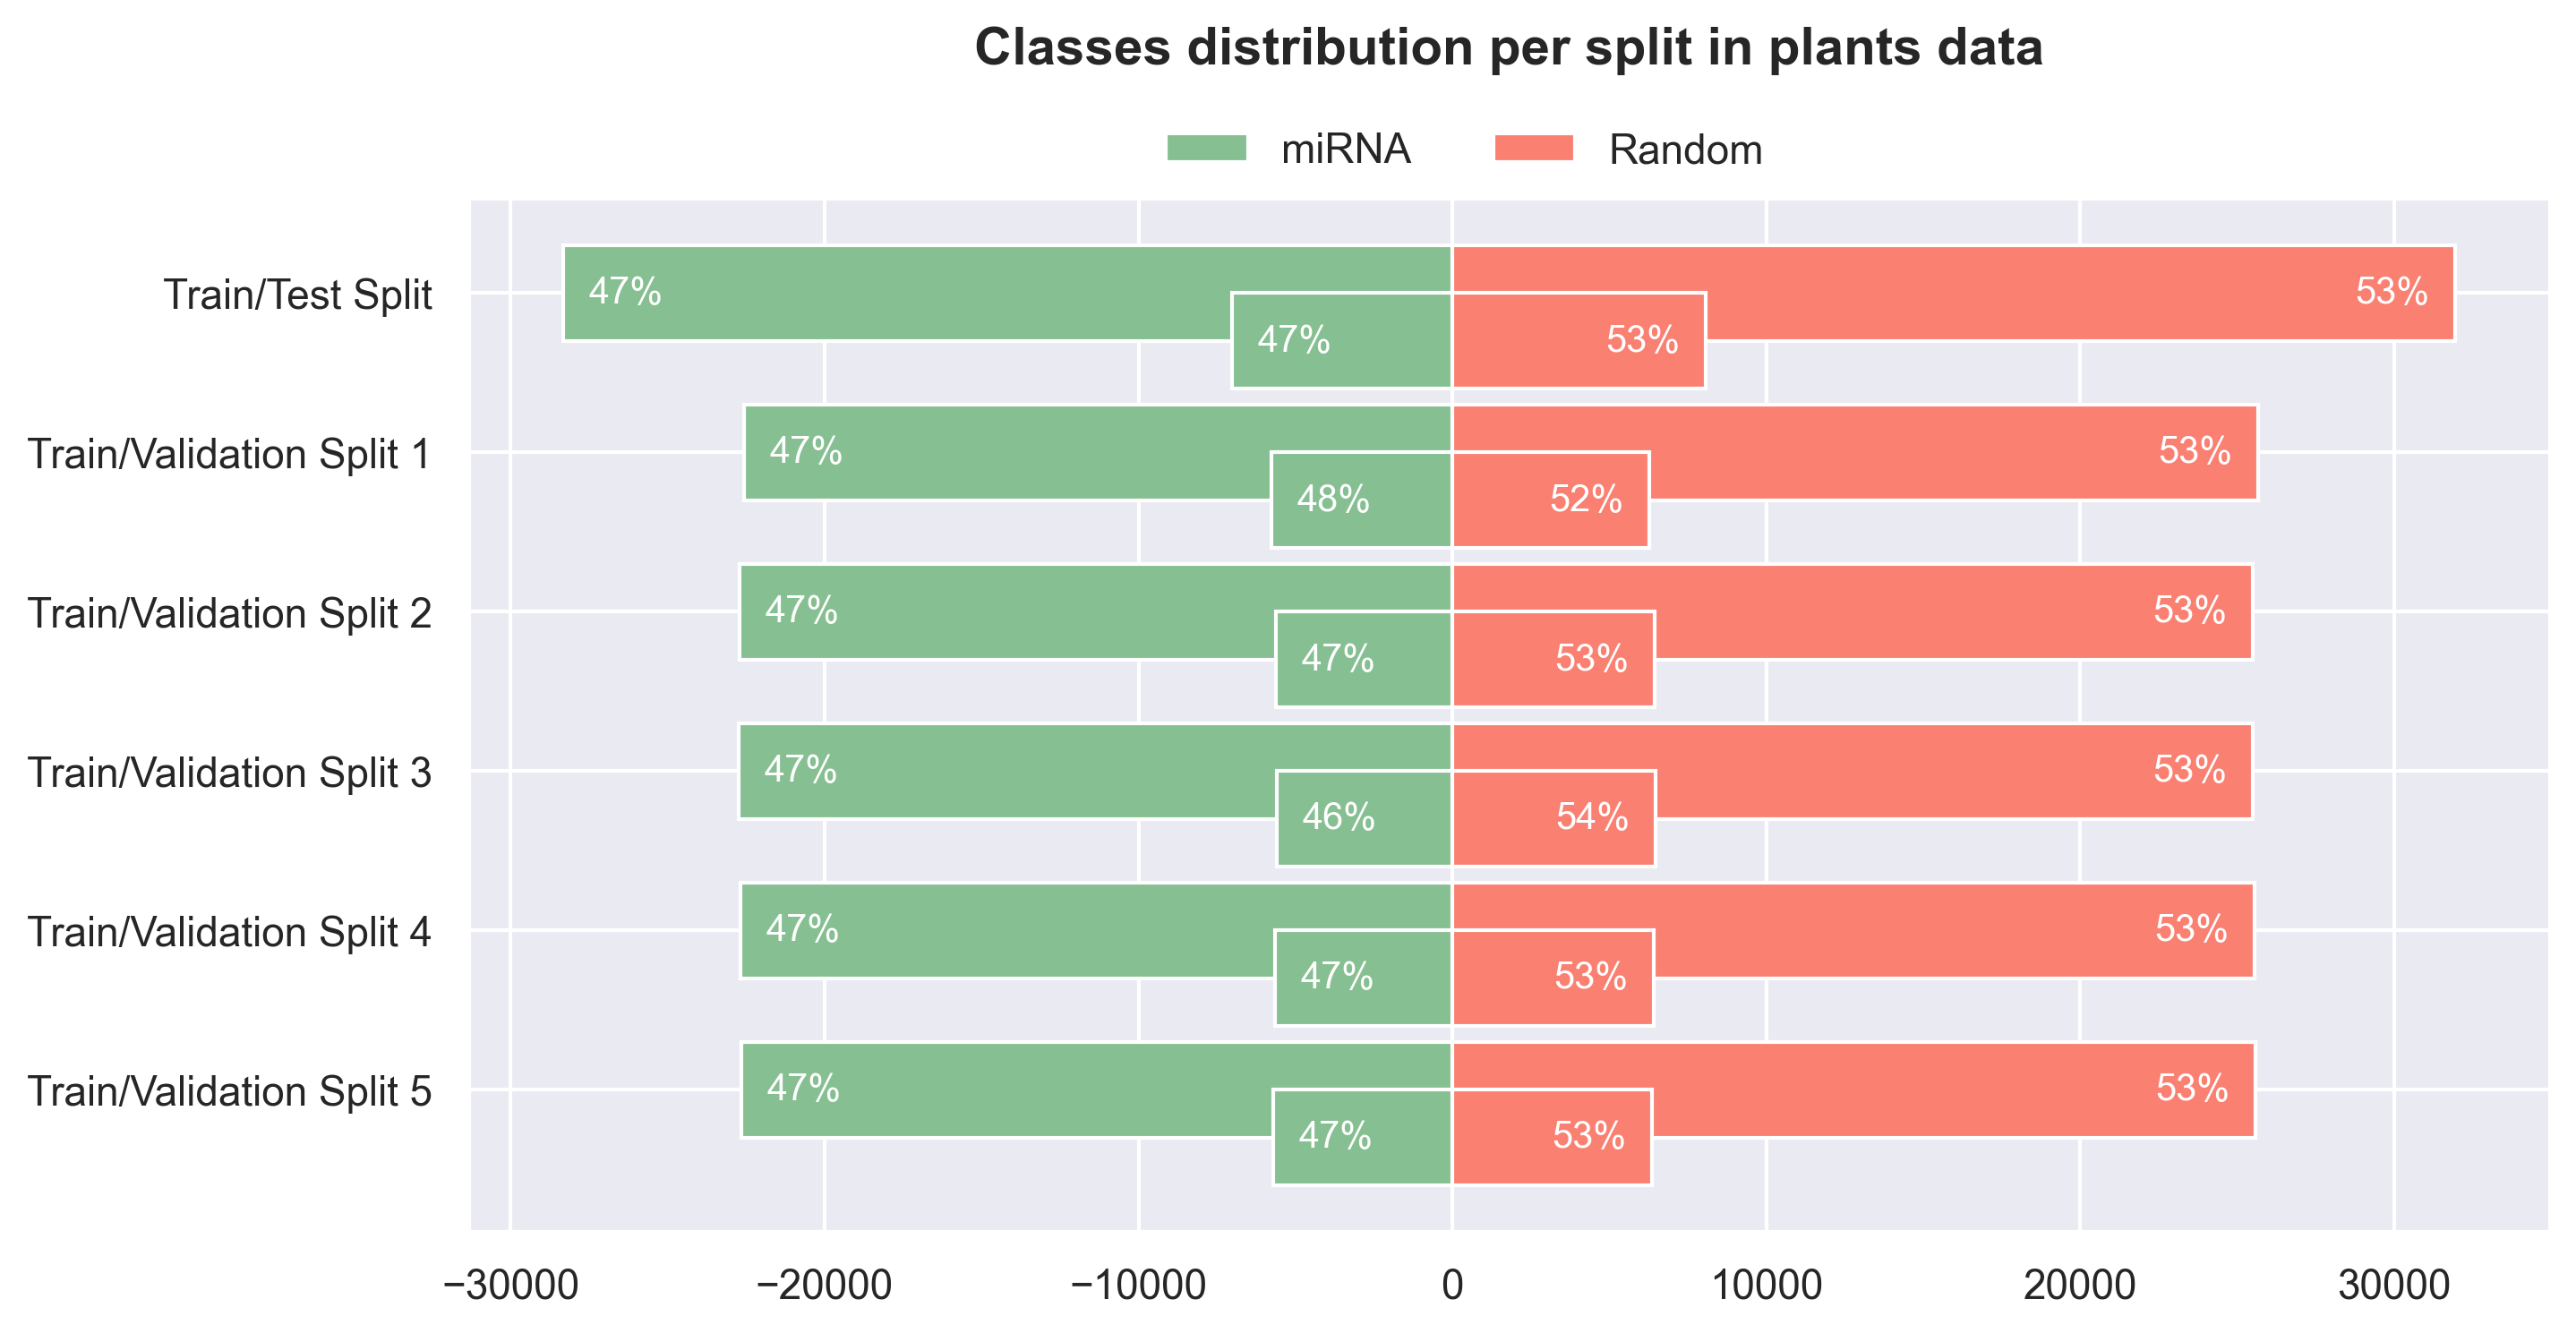

In [350]:
# Plants data class visualization
category = ['Train/Test Split'] + [f'Train/Validation Split {i+1}' for i in range(5)]

rand_train = df.filter(regex='Train*').loc['Plants data (Rand)']
miRNA_train = df.filter(regex='Train*').loc['Plants data (miRNA)']
rand_test = df.filter(regex='Test*|Validation*').loc['Plants data (Rand)']
miRNA_test = df.filter(regex='Test*|Validation*').loc['Plants data (miRNA)']

fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.set_title('Classes distribution per split in plants data\n\n', fontsize=14, fontweight='bold')
ax.barh(category, miRNA_train*-1, align='center', height = 0.6, color='#86bf91', label='miRNA')
ax.barh(category, rand_train, align='center', height = 0.6, color='salmon', label='Random')
ax.barh(np.arange(len(category))+0.3, miRNA_test*-1, align='center', height = 0.6, color='#86bf91')
ax.barh(np.arange(len(category))+0.3, rand_test, align='center', height = 0.6, color='salmon')
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(0.64, 1.1), ncol=2, frameon=False)
#plt.box(False) #remove box

# annotations:
train_sum = list(df.iloc[:2].sum().filter(regex='Train*')[::-1])
test_sum = list(df.iloc[:2].sum().filter(regex='Test*|Validation*')[::-1])
train_sum2, test_sum2 = train_sum.copy(), test_sum.copy()
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         if width < 10000: total = test_sum.pop()
         else: total = train_sum.pop()
         ax.annotate(f"{round((width/total)*100, 2):,.0f}%", 
                     xy=(left+width-2000, bottom+height/2), ha='center', va='center', 
                     fontsize=10, color='white')
    elif width < 0:
          if width > -10000: total = test_sum2.pop()
          else: total = train_sum2.pop()
          ax.annotate(f"{round((width*-1/total)*100, 2):,.0f}%", 
                      xy=(left+width+2000, bottom+height/2), ha='center', va='center', 
                     fontsize=10, color='white')

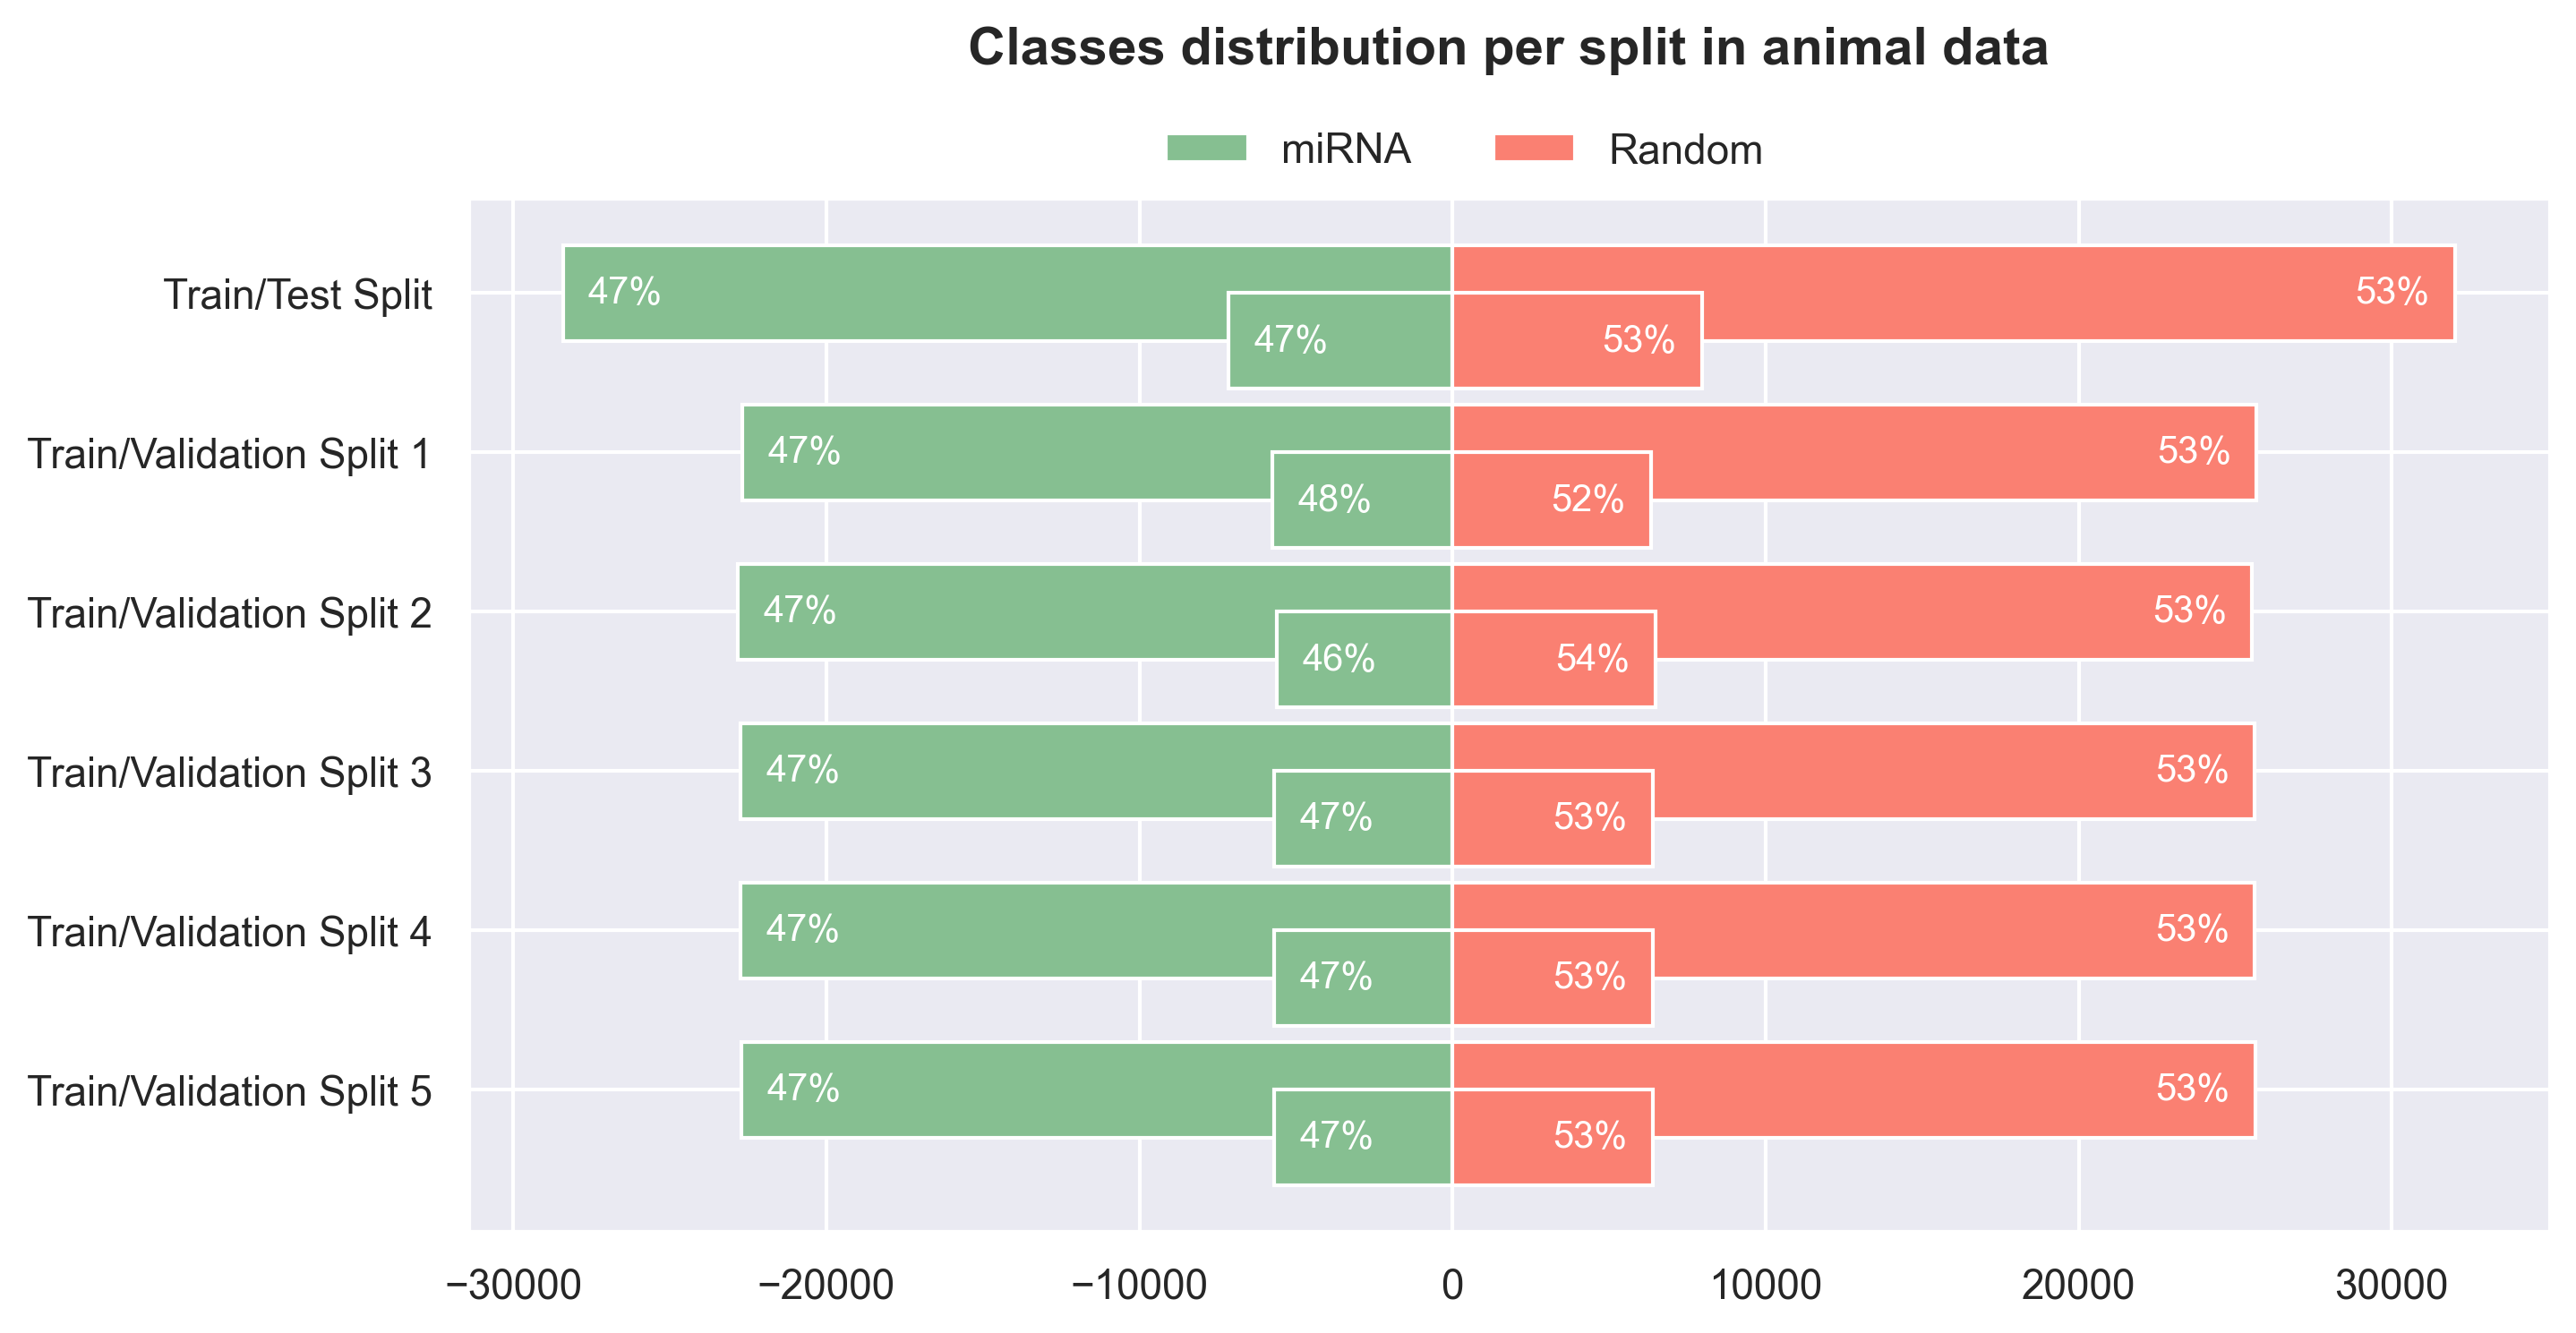

In [390]:
# Animal data class visualization
category = ['Train/Test Split'] + [f'Train/Validation Split {i+1}' for i in range(5)]

rand_train = df.filter(regex='Train*').loc['Animal data (Rand)']
miRNA_train = df.filter(regex='Train*').loc['Animal data (miRNA)']
rand_test = df.filter(regex='Test*|Validation*').loc['Animal data (Rand)']
miRNA_test = df.filter(regex='Test*|Validation*').loc['Animal data (miRNA)']

fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.set_title('Classes distribution per split in animal data\n\n', fontsize=14, fontweight='bold')
ax.barh(category, miRNA_train*-1, align='center', height = 0.6, color='#86bf91', label='miRNA')
ax.barh(category, rand_train, align='center', height = 0.6, color='salmon', label='Random')
ax.barh(np.arange(len(category))+0.3, miRNA_test*-1, align='center', height = 0.6, color='#86bf91')
ax.barh(np.arange(len(category))+0.3, rand_test, align='center', height = 0.6, color='salmon')
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(0.64, 1.1), ncol=2, frameon=False)
#plt.box(False) #remove box

# annotations:
train_sum = list(df.iloc[2:4].sum().filter(regex='Train*')[::-1])
test_sum = list(df.iloc[2:4].sum().filter(regex='Test*|Validation*')[::-1])
train_sum2, test_sum2 = train_sum.copy(), test_sum.copy()
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         if width < 10000: total = test_sum.pop()
         else: total = train_sum.pop()
         ax.annotate(f"{round((width/total)*100, 2):,.0f}%", 
                     xy=(left+width-2000, bottom+height/2), ha='center', va='center', 
                     fontsize=10, color='white')
    elif width < 0:
          if width > -10000: total = test_sum2.pop()
          else: total = train_sum2.pop()
          ax.annotate(f"{round((width*-1/total)*100, 2):,.0f}%", 
                      xy=(left+width+2000, bottom+height/2), ha='center', va='center', 
                     fontsize=10, color='white')

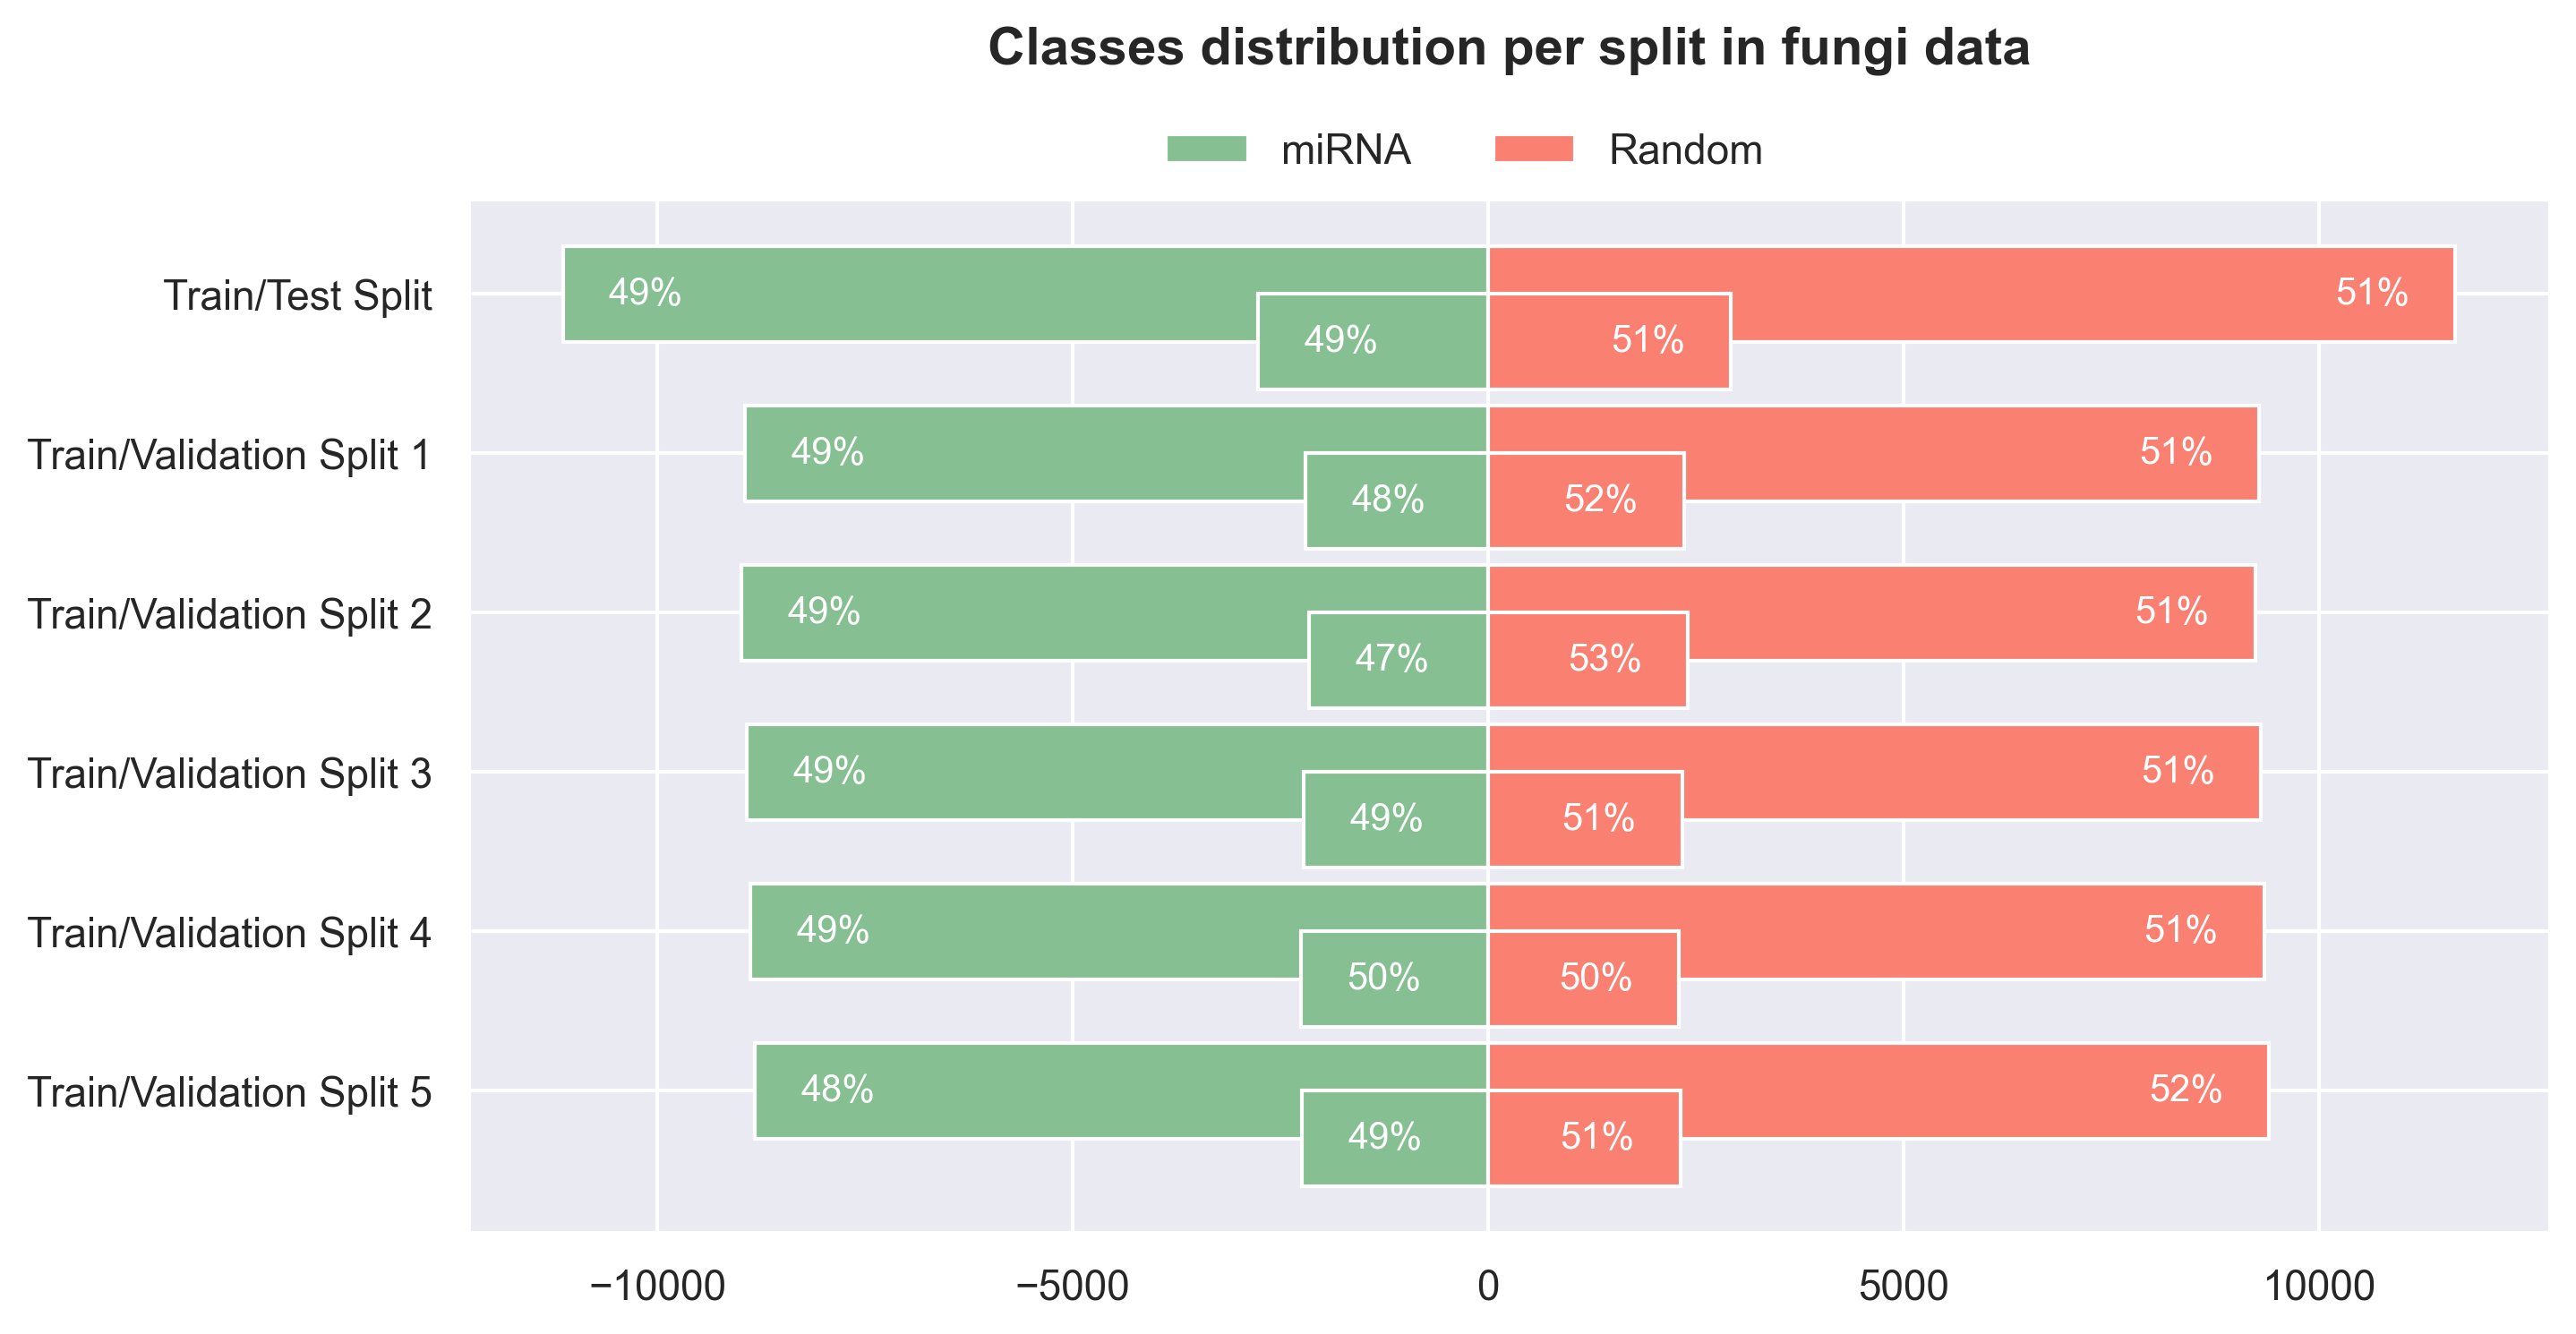

In [395]:
# Fungi data class visualization
category = ['Train/Test Split'] + [f'Train/Validation Split {i+1}' for i in range(5)]

rand_train = df.filter(regex='Train*').loc['Fungi data (Rand)']
miRNA_train = df.filter(regex='Train*').loc['Fungi data (miRNA)']
rand_test = df.filter(regex='Test*|Validation*').loc['Fungi data (Rand)']
miRNA_test = df.filter(regex='Test*|Validation*').loc['Fungi data (miRNA)']

fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.set_title('Classes distribution per split in fungi data\n\n', fontsize=14, fontweight='bold')
ax.barh(category, miRNA_train*-1, align='center', height = 0.6, color='#86bf91', label='miRNA')
ax.barh(category, rand_train, align='center', height = 0.6, color='salmon', label='Random')
ax.barh(np.arange(len(category))+0.3, miRNA_test*-1, align='center', height = 0.6, color='#86bf91')
ax.barh(np.arange(len(category))+0.3, rand_test, align='center', height = 0.6, color='salmon')
ax.invert_yaxis()
ax.legend(bbox_to_anchor=(0.64, 1.1), ncol=2, frameon=False)
#plt.box(False) #remove box

# annotations:
train_sum = list(df.iloc[4:6].sum().filter(regex='Train*')[::-1])
test_sum = list(df.iloc[4:6].sum().filter(regex='Test*|Validation*')[::-1])
train_sum2, test_sum2 = train_sum.copy(), test_sum.copy()
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         if width < 5000: total = test_sum.pop()
         else: total = train_sum.pop()
         ax.annotate(f"{round((width/total)*100, 2):,.0f}%", 
                     xy=(left+width-1000, bottom+height/2), ha='center', va='center', 
                     fontsize=10, color='white')
    elif width < 0:
          if width > -5000: total = test_sum2.pop()
          else: total = train_sum2.pop()
          ax.annotate(f"{round((width*-1/total)*100, 2):,.0f}%", 
                      xy=(left+width+1000, bottom+height/2), ha='center', va='center', 
                     fontsize=10, color='white')